# CS381/780 Data Analytics Final Project

### Due on 12/9/2020 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on data provided by LendingClub 

https://www.lendingclub.com
    
### The dataset was provided by Kaggle and contains information on loan borrowers 
collected by LendingClub from the year 2007 to 2010. 



Listing of attributes:
    
* credit.policy: a set of guidelines and criteria that decides on credit limits, credit terms, and how to go about delinquent accounts. The borrower either meets the criteria (represented by the integer 1 in our data) or does not (represented by 0 in our data).
* purpose: purpose of the loan contracted (a.i: installment, debt consolidation)
* int.rate: interest rate on the loan.
* installment: monthly payment owed by the borrower.
* log.annual.inc: natural logarithm of self-reported income.
* dti: Debt-to-Income ratio
* fico: FICO score of loan borrowers
* days.with.cr.line: number of days with line of credit.
* revol.bal: revolving balance or the portion of credit that remains unpaid after billing cycle.
* revol.util: revolving utilization or debt-to-limit ratio, debt divided by credit limit.
* inq.last.6mths: inquiries during last 6 months. Inquiries happen when a financial institution checks your credit to make a lending decision, this usually happens when you apply for credit. There are two types of inquiries: hard inquiries or ‘hard pulls’ when you apply for mortgage, credit card… and soft inquiries or ‘soft pulls’ for credit card offers or employment. For the purpose of this project, we will consider the data to represent ‘hard pulls’.
* delinq.2yrs: number of loan delinquencies (30 days or more past due on a payment) reported during the past 2 years.
* pub.rec: number of derogatory public records of loan borrowers.
* not.fully.paid: this column shows whether a loan was not fully paid (1) or fully paid (0)

### Your task in the final project is build the best predictive model to predict what type of borrower will be more likely to default (i.e not fully paid back their loan)

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* The best performance model will have an extra 5 points, but the whole project will still be capped 100



### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


In [4]:
df = pd.read_csv("lendingclub_loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

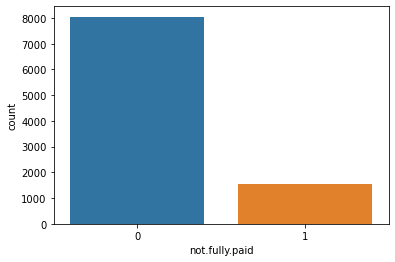

In [5]:
sns.countplot(df['not.fully.paid'])

### Good Luck !!!

Show all your work below

# -------------------------------------------------------------------------------------------------------------

# EDA (Chekcing missing values, removing, outliers)

In [6]:
df.shape

(9581, 14)

In [7]:
# At first checking for null value in the datasets.
df.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment           True
log.annual.inc        True
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

In [8]:
# Remove any rows that has null or NA 
# In this case we has null or NA in installment and log.annual.inc
df.dropna(inplace=True)
df.shape

(9580, 14)

In [9]:
# Checking the data set if the null or NA value has been droped.
df.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

### Check for outliers through the boxplot and then check the data inside those boxplot data colume and remove if necessary.

<AxesSubplot:xlabel='int.rate'>

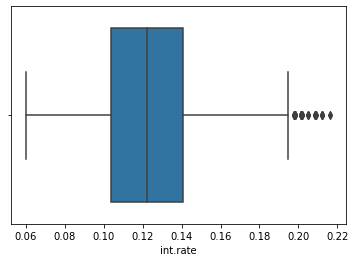

In [10]:
sns.boxplot(x=df['int.rate'])

In [11]:
#Checking the data set if any outliner exits by displaying all the data. 
df['int.rate'].unique()

array([0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.0788, 0.1496, 0.1114,
       0.1134, 0.1221, 0.1347, 0.1324, 0.0859, 0.0714, 0.0863, 0.1103,
       0.1317, 0.0894, 0.1039, 0.1513, 0.08  , 0.1355, 0.1229, 0.0901,
       0.0743, 0.1375, 0.0807, 0.1028, 0.087 , 0.1122, 0.0996, 0.0933,
       0.0838, 0.0775, 0.1059, 0.1596, 0.1154, 0.1343, 0.1249, 0.0964,
       0.1186, 0.1501, 0.128 , 0.1091, 0.1217, 0.1533, 0.0712, 0.1438,
       0.1565, 0.1467, 0.1312, 0.147 , 0.1407, 0.1014, 0.1046, 0.133 ,
       0.0983, 0.1393, 0.092 , 0.1236, 0.1362, 0.1078, 0.1583, 0.1109,
       0.1141, 0.1267, 0.1204, 0.0951, 0.1172, 0.1299, 0.1488, 0.152 ,
       0.1425, 0.1836, 0.1615, 0.06  , 0.0832, 0.1261, 0.0945, 0.1197,
       0.1387, 0.0976, 0.1292, 0.0737, 0.0768, 0.1166, 0.1418, 0.1545,
       0.1482, 0.1703, 0.145 , 0.1671, 0.1576, 0.1608, 0.164 , 0.1734,
       0.1051, 0.157 , 0.1222, 0.1273, 0.1379, 0.1253, 0.1128, 0.1286,
       0.1287, 0.097 , 0.1001, 0.1538, 0.1191, 0.1254, 0.1159, 0.138 ,
      

In [12]:
#  Displaying the data of the purpose for getting the loan.

df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

<AxesSubplot:xlabel='installment'>

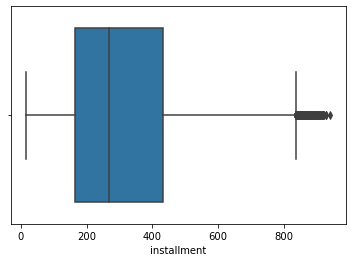

In [13]:
sns.boxplot(x=df['installment'])

In [14]:
df['installment'].unique()

array([829.1 , 228.22, 366.86, ..., 161.01, 257.7 , 853.43])

<AxesSubplot:xlabel='log.annual.inc'>

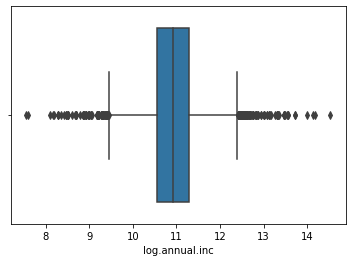

In [15]:
sns.boxplot(x=df['log.annual.inc'])

In [16]:
df['log.annual.inc'].unique()

array([11.35040654, 11.08214255, 10.37349118, ..., 12.29225034,
       10.99909533, 10.11047245])

<AxesSubplot:xlabel='dti'>

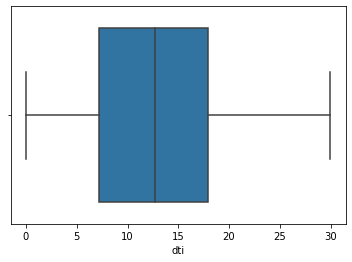

In [17]:
sns.boxplot(x=df['dti'])

<AxesSubplot:xlabel='fico'>

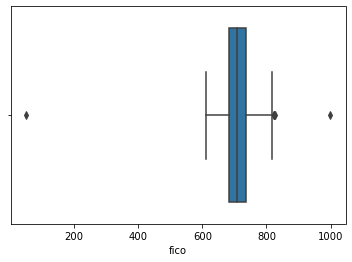

In [18]:
sns.boxplot(x=df['fico'])

In [19]:
# Checking the element that has been outlier.
print('Total rows and columns : ', df.shape)

df['fico'].unique()

Total rows and columns :  (9580, 14)


array([737, 707, 682, 712, 667, 727, 722, 677, 662,  50, 999, 767, 747,
       702, 672, 797, 772, 782, 802, 812, 742, 692, 777, 762, 757, 787,
       717, 752, 792, 627, 687, 697, 732, 822, 632, 807, 817, 827, 642,
       647, 652, 657, 637, 612, 617, 622], dtype=int64)

In [20]:
# Removing the outlier form the actual range of fico score betweeen 300 and 850.
df = df[df.fico > 300]
df = df[df.fico < 850]

print()
print('Total rows and columns after removing outlier : ', df.shape)
print()
df['fico'].unique()



Total rows and columns after removing outlier :  (9578, 14)



array([737, 707, 682, 712, 667, 727, 722, 677, 662, 767, 747, 702, 672,
       797, 772, 782, 802, 812, 742, 692, 777, 762, 757, 787, 717, 752,
       792, 627, 687, 697, 732, 822, 632, 807, 817, 827, 642, 647, 652,
       657, 637, 612, 617, 622], dtype=int64)

<AxesSubplot:xlabel='days.with.cr.line'>

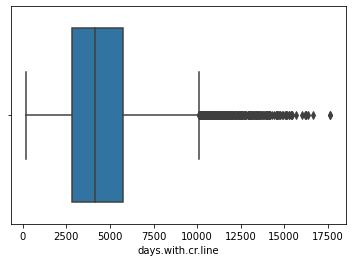

In [21]:
sns.boxplot(x=df['days.with.cr.line'])

In [22]:
#df['days.with.cr.line'].unique

<AxesSubplot:xlabel='revol.bal'>

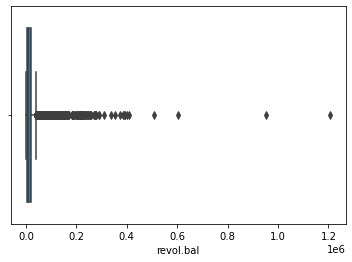

In [23]:
sns.boxplot(x=df['revol.bal'])

In [24]:
#df['revol.bal'].unique

<AxesSubplot:xlabel='revol.util'>

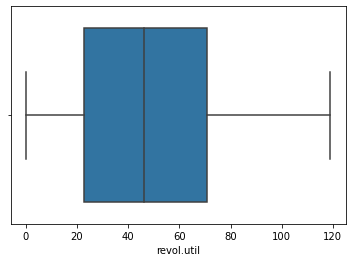

In [25]:
sns.boxplot(x=df['revol.util'])

# -------------------------------------------------------------------------------------------------------------

# Performed basic exploration of relationship, with plots and graphs

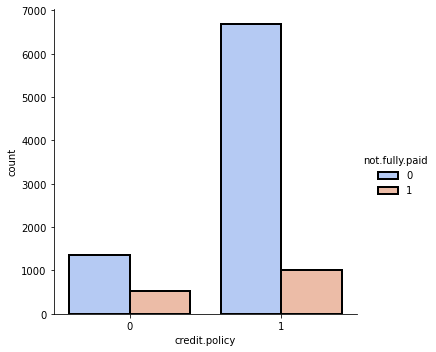

In [26]:
sns.factorplot('credit.policy', kind = 'count', hue = 'not.fully.paid', data =df, palette = 'coolwarm',edgecolor='black', linewidth=2)

#### The above chart demostrates that lender who doesn't meet the credit policy has the highest ratio to not pay back fully. 

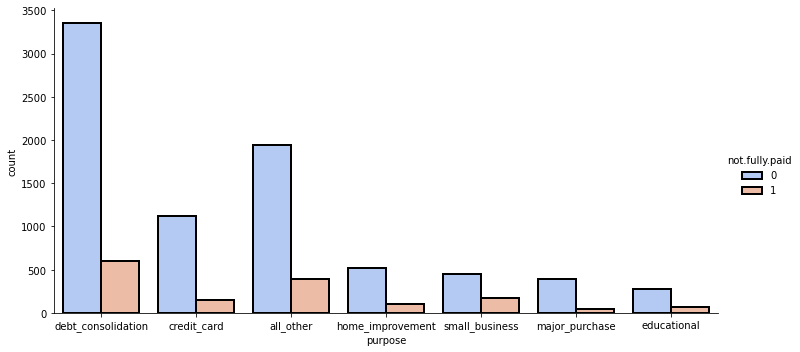

In [27]:
sns.factorplot('purpose', kind = 'count', hue = 'not.fully.paid', data =df, palette = 'coolwarm',edgecolor='black', linewidth=2, aspect=2)

#### On the above graph, we have compare the relation between the purpose and not.fully.paid.  The small business has the highest ratio of the number of people who are unable to pay a loan than the rest of purpose.

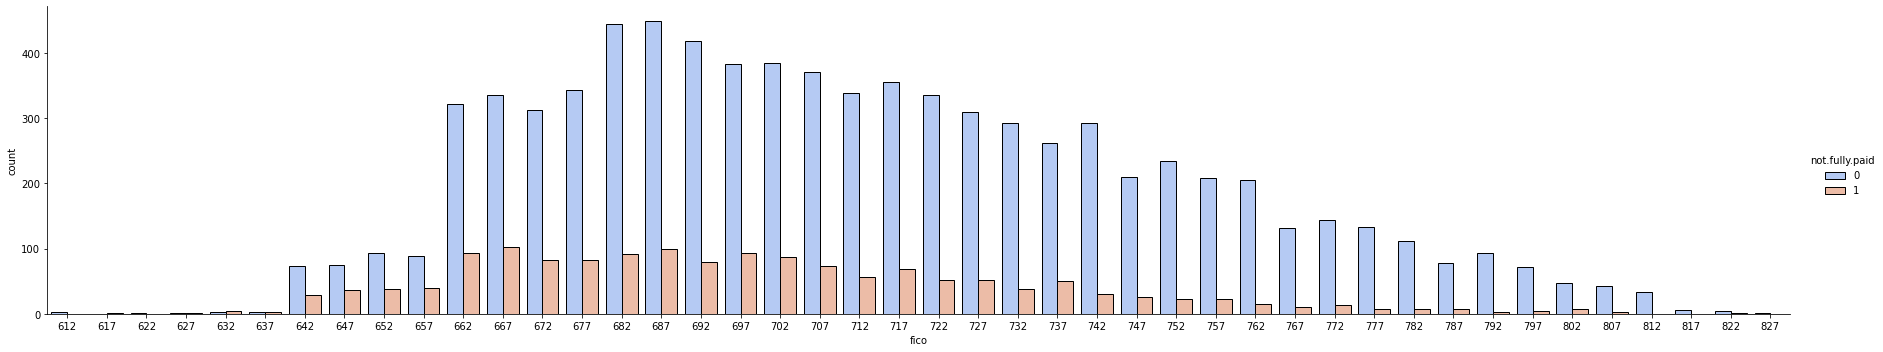

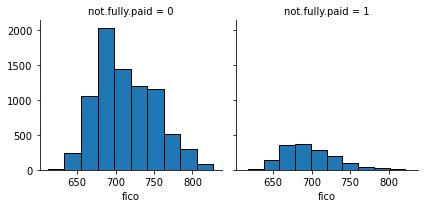

In [28]:
sns.factorplot('fico', kind = 'count', hue = 'not.fully.paid', data =df, palette = 'coolwarm',edgecolor='black', linewidth=1,aspect=5)

g = sns.FacetGrid(df, col='not.fully.paid')
g = g.map(plt.hist, 'fico', bins = 10,edgecolor='Black', linewidth=1)

#### From the above graph , While comparing the ratio on all of the range , the fico score range that falls below 650 has the highest rate of  lenders who are unable to pay a loan fully.

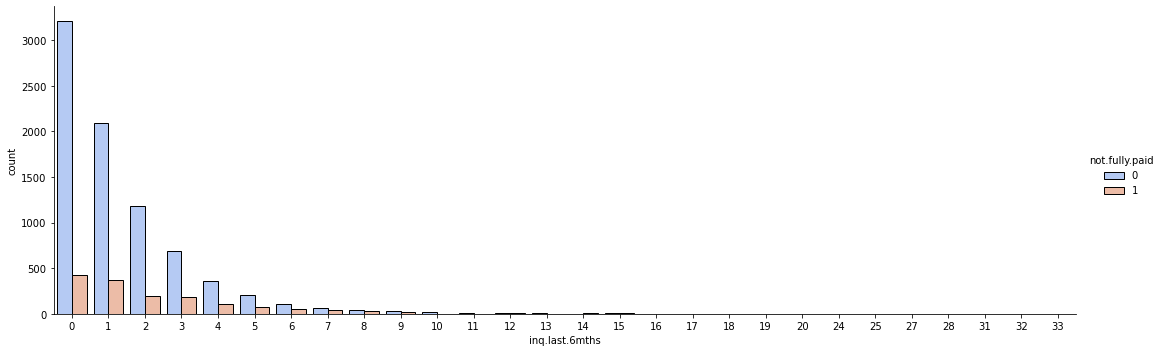

In [29]:
sns.factorplot('inq.last.6mths', kind = 'count', hue = 'not.fully.paid', data =df, palette = 'coolwarm',edgecolor='black', linewidth=1, aspect=3)

#### From the above chart , it is illustrate that lender who has  increases the inquiries above the 6 month has the high chance of not paying the loan fully. 

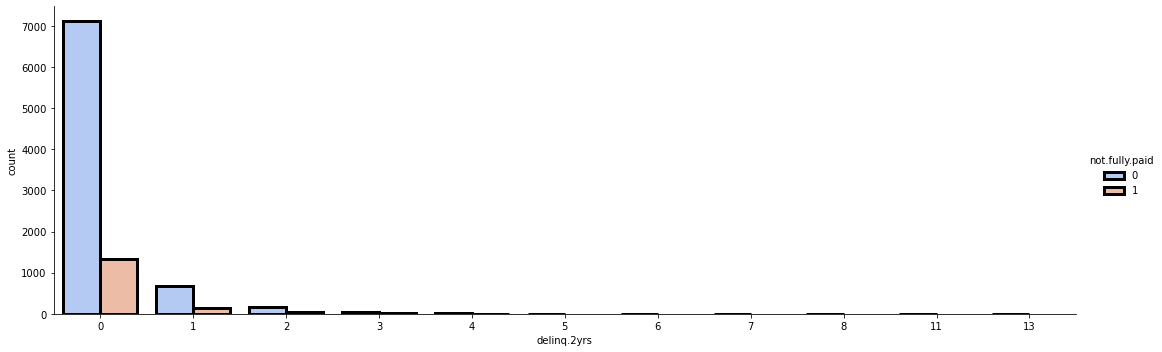

In [30]:
sns.factorplot('delinq.2yrs', kind = 'count', hue = 'not.fully.paid', data =df, palette = 'coolwarm',edgecolor='black', linewidth=3,aspect=3)

#### This chart demonstrate that the lender who have missed their payment 2 times  in past 2 years has higher number of not paying the loan fully.
#### Aslo , I have notice that there are rarely few people who have missed their payment 3 times and the lender who miss more than 3 times  are competly unable to pay the loan.


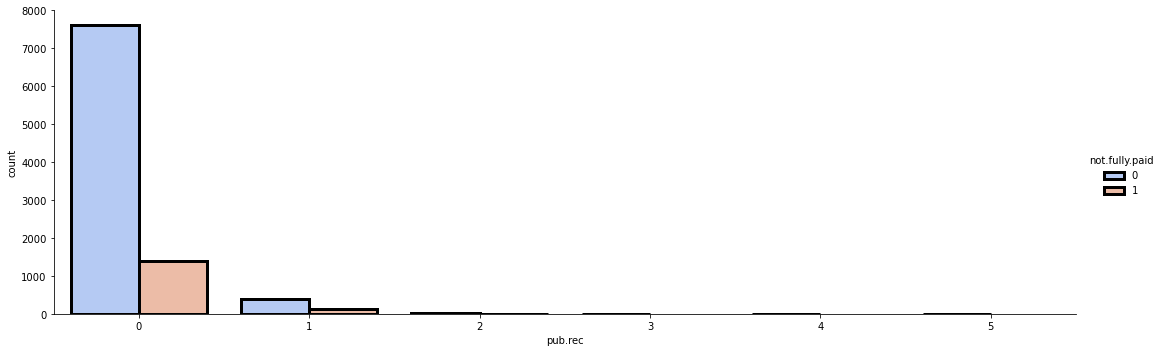

In [31]:
sns.factorplot('pub.rec', kind = 'count', hue = 'not.fully.paid', data =df, palette = 'coolwarm',edgecolor='black', linewidth=3,aspect=3)

####  While comparing the public recod vs not fully paid ratio we come know that the public record with 1 has higher chance of not paying the loan fully. 
####  Aslo,There are rarely few lender who have public record more than 2. However, It also demonstrate that the lender who have more public record than 2 are competly not paying the loan fully.  

# -------------------------------------------------------------------------------------------------------------

In [32]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Normalizing numerical features( Selecting the most important columns with its numerical values )

In [33]:
# Selecting the data that have numerical features.

numericalFeatures = ['installment','dti','fico', 'days.with.cr.line','not.fully.paid']

numerical_dataframe = df[numericalFeatures]
numerical_dataframe

,installment,dti,fico,days.with.cr.line,not.fully.paid
0,829.10,19.48,737,5639.958333,0
1,228.22,14.29,707,2760.000000,0
2,366.86,11.63,682,4710.000000,0
3,162.34,8.10,712,2699.958333,0
4,102.92,14.97,667,4066.000000,0
...,...,...,...,...,...
9576,344.76,10.39,672,10474.000000,1
9577,257.70,0.21,722,4380.000000,1
9578,97.81,13.09,687,3450.041667,1
9579,351.58,19.18,692,1800.000000,1


# -------------------------------------------------------------------------------------------------------------

# Observing the chart of all important categorical variable using the countplot that effects the not.paid.fully . 

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

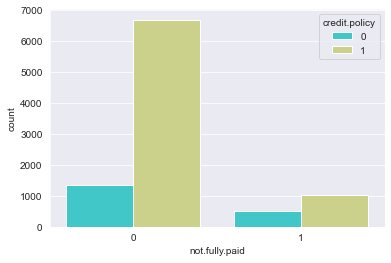

In [34]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid',hue='credit.policy',data=df,palette='rainbow')

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

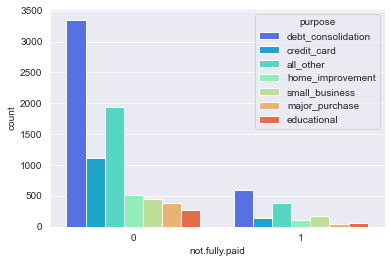

In [35]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid',hue='purpose',data=df,palette='rainbow')

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

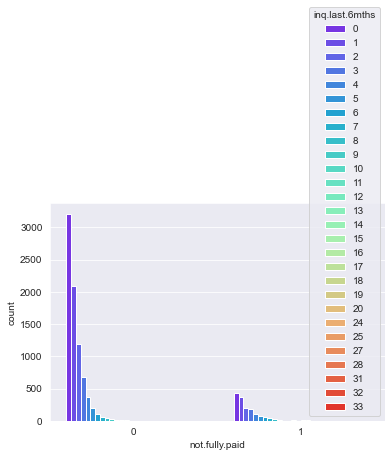

In [36]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid',hue='inq.last.6mths',data=df,palette='rainbow')

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

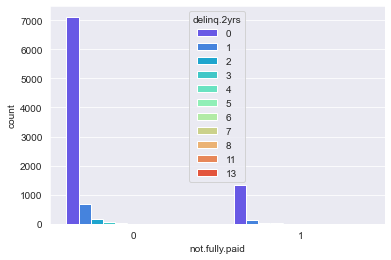

In [37]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid',hue='delinq.2yrs',data=df,palette='rainbow')

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

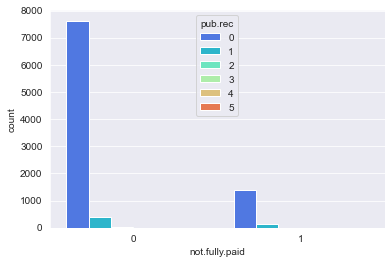

In [38]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid',hue='pub.rec',data=df,palette='rainbow')

# ---------------------------------------------------------------------------------------------------------

# Dummy method used to create categorical variable since all these categorical variable effect the not.fully.paid.

In [39]:
credit_policy = pd.get_dummies(df['credit.policy'],drop_first=True)
purpose = pd.get_dummies(df['purpose'],drop_first=True)
inq_last_6mths  = pd.get_dummies(df['inq.last.6mths'],drop_first=True)
delinq_2yrs = pd.get_dummies(df['delinq.2yrs'],drop_first=True)
pub_rec = pd.get_dummies(df['pub.rec'],drop_first=True)

In [40]:
# Checking if there is any null value
df.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

In [41]:
# Creating a new data set that combine the numerical features and the categeriol features.

new_df = pd.concat([numerical_dataframe,purpose,inq_last_6mths,pub_rec,credit_policy,delinq_2yrs],axis=1)

new_df

,installment,dti,fico,days.with.cr.line,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,...,1,2,3,4,5,6,7,8,11,13
0,829.10,19.48,737,5639.958333,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,228.22,14.29,707,2760.000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,366.86,11.63,682,4710.000000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,162.34,8.10,712,2699.958333,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,102.92,14.97,667,4066.000000,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9576,344.76,10.39,672,10474.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9577,257.70,0.21,722,4380.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9578,97.81,13.09,687,3450.041667,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9579,351.58,19.18,692,1800.000000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Seperating data set into training and testing.
## Checking three models and checked their model performance.

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(new_df.drop('not.fully.paid',axis=1),
                                                    new_df['not.fully.paid'], 
                                                    test_size=0.20, 
                                                    random_state=101)

In [43]:
# Model 1 : LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

Logistic_Model = LogisticRegression()
Logistic_Model.fit(X_train,Y_train)
predictions = Logistic_Model.predict(X_test)

print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.50      0.01      0.02       293

    accuracy                           0.85      1916
   macro avg       0.67      0.50      0.47      1916
weighted avg       0.79      0.85      0.78      1916

0.8470772442588727


In [44]:
#Model 2   : RANDOMfOREST CLASSIFIER
RandomForest_model = RandomForestClassifier(n_estimators=100)
RandomForest_model.fit(X_train, Y_train )
prediction = RandomForest_model.predict(X_test)

print(classification_report(Y_test,prediction))
print('Accuracy: ', accuracy_score(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1623
           1       0.38      0.03      0.05       293

    accuracy                           0.84      1916
   macro avg       0.62      0.51      0.48      1916
weighted avg       0.78      0.84      0.78      1916

Accuracy:  0.8444676409185804


In [45]:
#Model 3 : GAUSSIAN NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
NaiveBayes_model = GaussianNB()

NaiveBayes_model.fit(X_train, Y_train )
prediction = NaiveBayes_model.predict(X_test)
print(classification_report(Y_test,prediction))
print('Accuracy : ', accuracy_score(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1623
           1       0.30      0.24      0.27       293

    accuracy                           0.80      1916
   macro avg       0.58      0.57      0.57      1916
weighted avg       0.78      0.80      0.79      1916

Accuracy :  0.7985386221294363


###  In the above 3 model , model 1 and model 2 have higher accuracy rate then model 3. However, our data set is not similar  and has a huge difference between the lender paying their full loan ( i.e = 0)  vs lender who didn't pay full.(i.e = 1) .  This means we have imbalance classes ,so rather than selecting the model through the accuracy i am choosing the model base on F1 score. I have notice that the f1 score for who didn't pay loan full in model 1 is 0.2 and model 2 is 0.5 while model 3 = 0.27. This is why i choose model 2 and model 3 for the cross validation. 

#### Note : Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case.

# ----------------------------------------------------------------------------------------------------------

# Performing cross-validations between the Model 2 ( Random Forest) and Model 3 (Gaussian Naive Bayes). 

In [46]:
from sklearn import metrics
import random

Trial 1, Accuracy Score: 0.8282881002087683, 
Trial 2, Accuracy Score: 0.8366388308977035, 
Trial 3, Accuracy Score: 0.8382045929018789, 
Trial 4, Accuracy Score: 0.8308977035490606, 
Trial 5, Accuracy Score: 0.8345511482254697, 
Trial 6, Accuracy Score: 0.8418580375782881, 
Trial 7, Accuracy Score: 0.848643006263048, 
Trial 8, Accuracy Score: 0.8136743215031316, 
Trial 9, Accuracy Score: 0.8251565762004175, 
Trial 10, Accuracy Score: 0.8298538622129437, 


<AxesSubplot:xlabel='trial'>

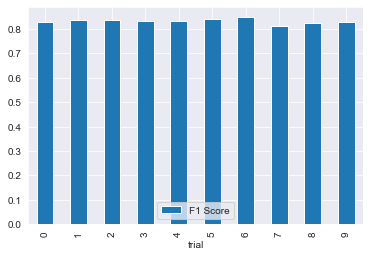

In [47]:
#Cross validation on Model 2
f1score=[]
for i in range(10):
    X_train, X_test, Y_train , Y_test = train_test_split(new_df.drop('not.fully.paid',axis=1),
                                                    new_df['not.fully.paid'], 
                                                    test_size=0.20, random_state = random.randint(1,1000))
    model2 = RandomForestClassifier(n_estimators=100)
    model2.fit(X_train, Y_train)
    model2_predictions = model2.predict(X_test)
    print('Trial {}, Accuracy Score: {}, '.format(i+1, accuracy_score(Y_test, model2_predictions)))
    f1score.append(accuracy_score(Y_test, model2_predictions))

    
score = pd.DataFrame( {'trial': range(10), 'F1 Score': f1score})
score.plot.bar(x='trial', y='F1 Score')

### The 10 trials of f1 score for Model 2 is very close to each other. This means our model is in good shape and it is a good model. 

Trial 1, Accuracy Score: 0.7938413361169102, 
Trial 2, Accuracy Score: 0.7823590814196242, 
Trial 3, Accuracy Score: 0.7907098121085595, 
Trial 4, Accuracy Score: 0.7927974947807933, 
Trial 5, Accuracy Score: 0.8079331941544885, 
Trial 6, Accuracy Score: 0.7964509394572025, 
Trial 7, Accuracy Score: 0.7901878914405011, 
Trial 8, Accuracy Score: 0.785490605427975, 
Trial 9, Accuracy Score: 0.7980167014613778, 
Trial 10, Accuracy Score: 0.7802713987473904, 


<AxesSubplot:xlabel='Trial'>

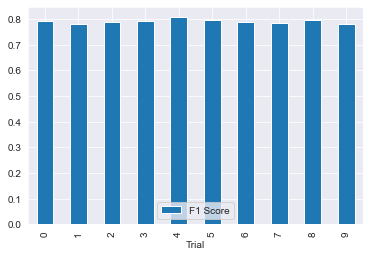

In [48]:
#Cross validation on Model 3
f1score=[]
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(new_df.drop('not.fully.paid',axis=1),
                                                    new_df['not.fully.paid'], 
                                                    test_size=0.20, random_state = random.randint(1,1000))
    from sklearn.naive_bayes import GaussianNB
    model3 = GaussianNB()
    
    model3.fit(X_train, Y_train)
    model3_predictions = model3.predict(X_test)
    
    print('Trial {}, Accuracy Score: {}, '.format(i+1, accuracy_score(Y_test, model3_predictions)))
    f1score.append(accuracy_score(Y_test, model3_predictions))

    
score = pd.DataFrame( {'Trial': range(10), 'F1 Score': f1score})
score.plot.bar(x='Trial', y='F1 Score')

### The 10 trials of f1 score for Model 3 is very close to each other. This means our model is in good shape and it is a good model. 

####  Note : Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case.

# In Conclusion,
#                       After cross valaditing the 2 model that has the highest F1 Score , I figure out that both of the our model are in good shapes and both model are good. However,  based on highest f1 score which is around 27 % , I want to conclude the best model for this project is model 3 (Gaussian Naive Bayes Classifer) . 